# Problem Set 3

## Question 1
Introduction:
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from this address.: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
<br>Step 3. Assign it to a variable called users
<br>Step 4. Discover what is the mean age per occupation
<br>Step 5. Discover the Male ratio per occupation and sort it from the most to the least
<br>Step 6. For each occupation, calculate the minimum and maximum ages
<br>Step 7. For each combination of occupation and sex, calculate the mean age
<br>Step 8. For each occupation present the percentage of women and men


In [3]:
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

#Step 2. Import the dataset from this address.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

#Step 3. Assign it to a variable called users
users = pd.read_csv(url, delimiter='|')



In [4]:
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [24]:
#Step 4. Discover what is the mean age per occupation

users.groupby('occupation')['age'].mean()


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [25]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

def male_ratio(group):
    total_users = len(group)
    male_users = group['gender'].value_counts().get('M', 0)
    return male_users / total_users


In [26]:
users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [27]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation')['age'].agg(['min', 'max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [28]:
#Step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation', 'gender'])['age'].mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [30]:
#Step 8. For each occupation present the percentage of women and men

def genderPercentage(group):
    users = len(group)
    w_users = group['gender'].value_counts().get('F', 0)
    m_users = group['gender'].value_counts().get('M', 0)
    w_percentage = (w_users / users) * 100
    m_percentage = (m_users / users) * 100
    return pd.Series({'Women Percentage': w_percentage, 'Men Percentage': m_percentage})


In [31]:
users.groupby('occupation').apply(genderPercentage)


,Women Percentage,Men Percentage
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


## Question 2
Euro Teams
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
<br>Step 3. Assign it to a variable called euro12
<br>Step 4. Select only the Goal column
<br>Step 5. How many team participated in the Euro2012?
<br>Step 6. What is the number of columns in the dataset?
<br>Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
<br>Step 8. Sort the teams by Red Cards, then to Yellow Cards
<br>Step 9. Calculate the mean Yellow Cards given per Team
<br>Step 10. Filter teams that scored more than 6 goals
<br>Step 11. Select the teams that start with G
<br>Step 12. Select the first 7 columns
<br>Step 13. Select all columns except the last 3
<br>Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [32]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)


euro12


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [33]:
#Step 4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [23]:
#Step 5. How many team participated in the Euro2012?

euro12['Team'].nunique()


16

In [22]:
#Step 6. What is the number of columns in the dataset?

euro12.shape[1]


35

In [36]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]


In [39]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)


,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [40]:
#Step 9. Calculate the mean Yellow Cards given per Team

discipline.groupby('Team')['Yellow Cards'].mean()


Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [41]:
#Step 10. Filter teams that scored more than 6 goals

euro12[euro12['Goals'] > 6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [42]:
#Step 11. Select the teams that start with G

euro12[euro12['Team'].str.startswith('G')]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [48]:
#Step 12. Select the first 7 columns

euro12[:7]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [49]:
#Step 13. Select all columns except the last 3

euro12[:-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [52]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3
Housing
<br>Step 1. Import the necessary libraries
<br>Step 2. Create 3 differents Series, each of length 100, as follows:
<br>• The first a random number from 1 to 4
<br>• The second a random number from 1 to 3
<br>• The third a random number from 10,000 to 30,000
<br>Step 3. Create a DataFrame by joinning the Series by column
<br>Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
<br>Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
<br>Step 6. Ops it seems it is going only until index 99. Is it true?
<br>Step 7. Reindex the DataFrame so it goes from 0 to 299


In [67]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np


#Step 2. Create 3 differents Series, each of length 100, as follows:

#• The first a random number from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, 100))

#• The second a random number from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, 100))

#• The third a random number from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, 100))


In [68]:
#Step 3. Create a DataFrame by joinning the Series by column

data = pd.DataFrame({'one': series1, 'two': series2, 'three': series3})


In [73]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

data

,bedrs,bathrs,price_sqr_meter
0,3,2,14592
1,1,1,20710
2,4,1,18982
3,4,1,25470
4,1,3,29562
...,...,...,...
95,3,2,14292
96,3,3,17882
97,4,1,18425
98,4,1,27103


In [75]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.concat([series1, series2, series3])
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])

bigcolumn


,bigcolumn
0,3
1,1
2,4
3,4
4,1
...,...
95,14292
96,17882
97,18425
98,27103


In [76]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

#Yes. Because we joined the 3 columns each with index 0 to 99 the index of this dataframe also goes only upto 99


In [77]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn = bigcolumn.reset_index(drop=True)

bigcolumn


,bigcolumn
0,3
1,1
2,4
3,4
4,1
...,...
295,14292
296,17882
297,18425
298,27103


## Question 4
Wind Statistics
<br>The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop orother looping construct. 
<br>The data in 'wind.data' has the following format:
<br>Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
<br>61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
<br>61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
<br>61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
<br>The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from the attached file wind.txt
<br>Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
<br>Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
<br>Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
<br>Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
<br>Step 7. Compute how many non-missing values there are in total.
<br>Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
<br>Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
<br>Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
<br>Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
<br>Step 12. Downsample the record to a yearly frequency for each location.
<br>Step 13. Downsample the record to a monthly frequency for each location.
<br>Step 14. Downsample the record to a weekly frequency for each location.
<br>Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [115]:
#Step 1. Import the necessary libraries
import numpy as np

#Step 2. Import the dataset from the attached file wind.txt

data = pd.read_csv('wind.txt', sep='\s+', parse_dates={'date': [0, 1, 2]})

data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [116]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
 
data.set_index('date', inplace=True)

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [117]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year
    

In [118]:
data.index = data.index.map(lambda x: pd.Timestamp(fix_year(x.year), x.month, x.day))

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [129]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

print("missing data")
null=data.isnull().sum()
missingData = null.sum()

print(missingData)

#Step 7. Compute how many non-missing values there are in total.
print("non missing data")
print(data.count().sum())


missing data
31
non missing data
78857


In [127]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

data.mean().mean()


10.227982360836938

In [130]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

loc_stats = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std()
})


In [132]:
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [133]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})


In [134]:
day_stats

,Min,Max,Mean,Std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [136]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

january_data = data[data.index.month == 1]
january_data.mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [145]:
#Step 12. Downsample the record to a yearly frequency for each location.

data.resample('Y').sum()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [146]:
#Step 13. Downsample the record to a monthly frequency for each location.

data.resample('M').sum()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65


In [148]:
#Step 14. Downsample the record to a weekly frequency for each location.

data.resample('W').sum()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,94.79,68.92,73.41,44.92,66.32,45.05,77.43,39.70,59.04,59.48,87.37,92.67
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,92.43,69.04,90.88,44.30,53.80,51.92,64.80,55.13,50.02,56.87,68.75,80.04
1961-01-29,119.28,112.99,127.58,89.04,122.03,103.80,108.70,106.12,101.36,109.48,146.51,157.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,104.54,78.63,97.59,38.96,71.51,60.33,67.50,53.80,63.08,66.83,82.85,131.10
1978-12-10,145.18,134.33,119.24,68.44,107.01,89.42,101.06,87.42,97.09,98.58,129.62,161.43
1978-12-17,117.31,102.85,104.91,48.42,79.78,50.91,71.46,55.77,64.18,59.96,77.72,108.94


In [149]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
data[data.index >= '1961-01-02'].resample('W').agg(['min', 'max', 'mean', 'std'])

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
...           ...    ...        ...       ...    ...    ...        ...   
1978-12-03   9.08  21.29  14.934286  4.931754   4.54  21.34  11.232857   
1978-12-10   9.92  29.33  20.740000  7.215012  12.54  24.79  19.190000   
1978-12-17   9.87  23.13  16.758571  4.499431   3.21  24.04  14.692857   
1978-12-24   6.21  16.62  11.155714  3.522759   3.63  13.29   8.008571   
1978-12-31   7.21  20.33  14.951429  4.350400   5.46  17.41  11.801429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
date                                ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
...              ...    ...    ...  ...        ...       ...    ...    ...   
1978-12-03  5.978968   8.21  24.04  ...   9.547143  6.284973   4.92  21.42   
1978-12-10  4.953060   7.21  25.37  ...  14.082857  5.516405   9.54  26.08   
1978-12-17  7.578665   8.04  18.05  ...   8.565714  5.487801   5.00  21.50   
1978-12-24  3.882900   8.50  22.21  ...   8.072857  3.023131   3.21  19.79   
1978-12-31  4.705392   7.83  27.29  ...  11.471429  5.533397   1.21  21.79   

                                   MAL                               
                 mean       std    min    max       mean        std  
date                                                                 
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571   1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286   4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286   4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000   3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714   4.336104  
...               ...       ...    ...    ...        ...        ...  
1978-12-03  11.835714  5.950112  11.50  25.75  18.728571   6.393188  
1978-12-10  18.517143  5.600389  15.34  34.59  23.061429   8.093976  
1978-12-17  11.102857  6.631925   6.92  22.83  15.562857   6.005594  
1978-12-24  11.845714  5.750301  10.29  31.71  18.977143   7.194108  
1978-12-31  12.947143  7.523148  11.96  41.46  26.844286  11.621233  

[939 rows x 48 columns]

## Question 5
<br>Step 1. Import the necessary libraries
<br>Step 2. Import the dataset from this address.
<br>Step 3. Assign it to a variable called chipo.
<br>Step 4. See the first 10 entries
<br>Step 5. What is the number of observations in the dataset?
<br>Step 6. What is the number of columns in the dataset?
<br>Step 7. Print the name of all the columns.
<br>Step 8. How is the dataset indexed?
<br>Step 9. Which was the most-ordered item?
<br>Step 10. For the most-ordered item, how many items were ordered?
<br>Step 11. What was the most ordered item in the choice_description column?
<br>Step 12. How many items were orderd in total?
<br>Step 13.
<br>• Turn the item price into a float
<br>• Check the item price type
<br>• Create a lambda function and change the type of item price
<br>• Check the item price type
<br>Step 14. How much was the revenue for the period in the dataset?
<br>Step 15. How many orders were made in the period?
<br>Step 16. What is the average revenue amount per order?
<br>Step 17. How many different items are sold?

In [150]:
#Step 1. Import the necessary libraries

import pandas as pd

#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

chipo


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [151]:

#Step 4. See the first 10 entries

chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [155]:
#Step 5. What is the number of observations in the dataset?

observations = chipo.shape[0]
print("number of observations = ",observations)


#Step 6. What is the number of columns in the dataset?

columns = chipo.shape[1]
print("number of Columns = ",columns)




number of observations =  4622
number of Columns =  5


In [154]:

#Step 7. Print the name of all the columns.

print("columns:")
print(chipo.columns)


columns:
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [158]:
#Step 8. How is the dataset indexed?

chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [161]:

#Step 9. Which was the most-ordered item?

mostOrdered = chipo['item_name'].value_counts().idxmax()
print(mostOrdered)


Chicken Bowl


In [162]:

#Step 10. For the most-ordered item, how many items were ordered?

chipo[chipo['item_name'] == mostOrdered]['quantity'].sum()



761

In [163]:
#Step 11. What was the most ordered item in the choice_description column?

chipo['choice_description'].value_counts().idxmax()

'[Diet Coke]'

In [164]:
#Step 12. How many items were orderd in total?

chipo['quantity'].sum()


4972

In [165]:
#Step 13.
#• Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

#• Check the item price type
print(chipo['item_price'].dtype)


float64


In [166]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)


39237.02


In [167]:
#Step 15. How many orders were made in the period?

num_orders = chipo['order_id'].nunique()
print(num_orders)


1834


In [168]:
#Step 16. What is the average revenue amount per order?

avgRevenue = revenue / num_orders
print(avgRevenue)

21.39423118865867


In [169]:
#Step 17. How many different items are sold?

chipo['item_name'].nunique()


50

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 
<br>Label both lines and show the legend.

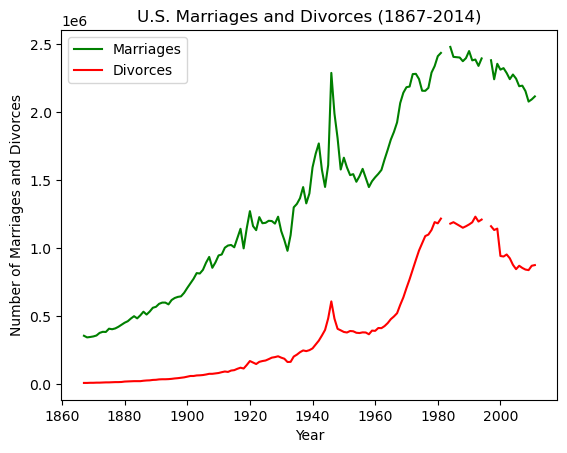

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

fig, ax = plt.subplots()


ax.plot(data['Year'], data['Marriages'], label='Marriages', color='green')
ax.plot(data['Year'], data['Divorces'], label='Divorces', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Marriages and Divorces')
ax.set_title('U.S. Marriages and Divorces (1867-2014)')
ax.legend()


## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

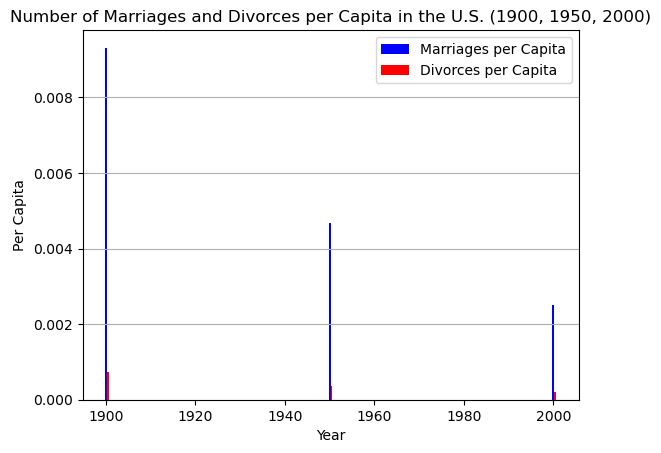

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

years = [1900, 1950, 2000]

marriages = []
divorces = []

for year in years:
    year = data[data['Year'] == year]
    mar = year_data['Marriages'].iloc[0]
    div = year_data['Divorces'].iloc[0]
    population = year['Population'].iloc[0]
    marriages.append(mar / population)
    divorces.append(div / population)


fig, ax = plt.subplots()

ax.bar(years, marriages, width=0.4, label='Marriages per Capita', align='center', color='blue')
ax.bar([year + 0.4 for year in years], divorces, width=0.4, label='Divorces per Capita', align='center', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
ax.legend()
ax.grid(axis='y')



Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


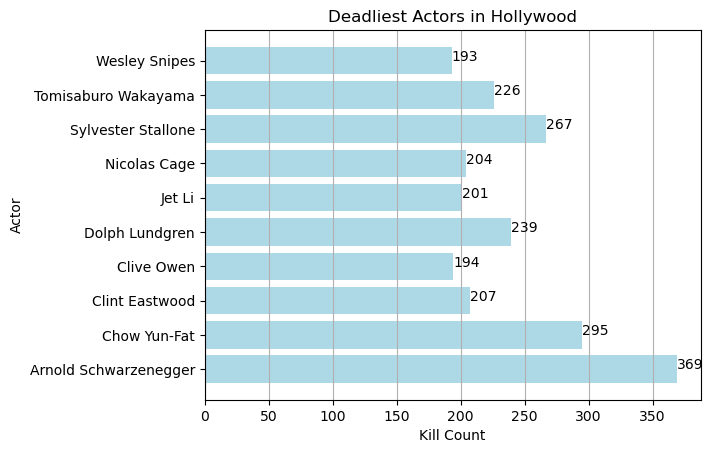

In [185]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('actor_kill_counts.csv')

fig, ax = plt.subplots()

ax.barh(data['Actor'], data['Count'], color='lightblue')
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood')
ax.grid(axis='x')
for index, value in enumerate(data['Count']):
    ax.text(value, index, str(value), ha='left')


## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


Text(0.5, 1.0, 'Fraction of Roman Emperors Assassinated')

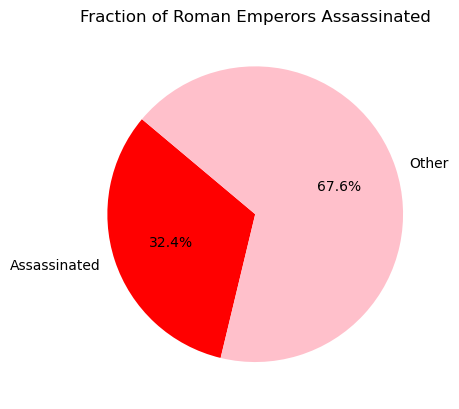

In [188]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('roman-emperor-reigns.csv')

assassinatedCount = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
totalEmperors = data.shape[0]

fractionAssassinated = assassinatedCount / totalEmperors
other = 1 - fractionAssassinated

labels = ['Assassinated', 'Other']
sizes = [fractionAssassinated, other]
colors = ['red', 'pink']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title('Fraction of Roman Emperors Assassinated')




## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.Don't forget to label your axes!Color each dot according to its year

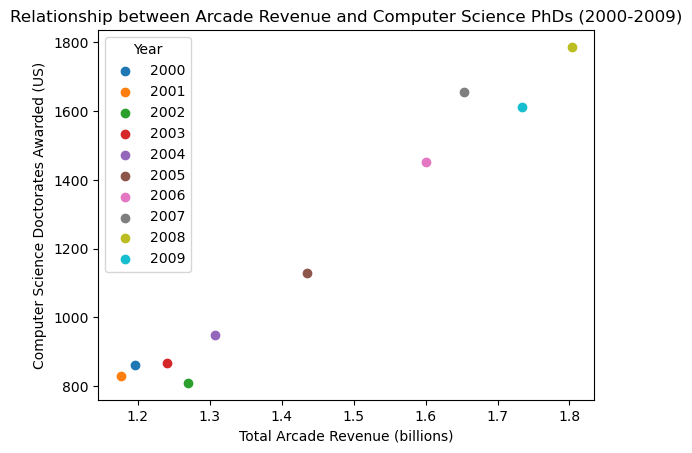

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')


fig, ax = plt.subplots()

for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    ax.scatter(year_data['Total Arcade Revenue (billions)'], year_data['Computer Science Doctorates Awarded (US)'],
               label=str(year) )

ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')
ax.set_title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
ax.legend(title='Year')

